## Check the data

In [7]:
from training.image_transforms import *
from training.paths import train_dir
from training.plots import *
from training.data_setup import DataManager
from PIL import Image
import random
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

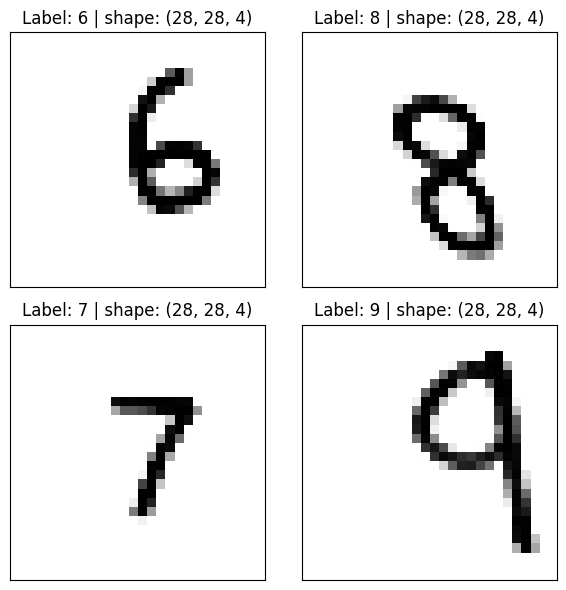

In [5]:
plot_random_images(path=train_dir, n=4, img_format='png', fig_width=6, show_shape=True)

In [8]:
data = DataManager()

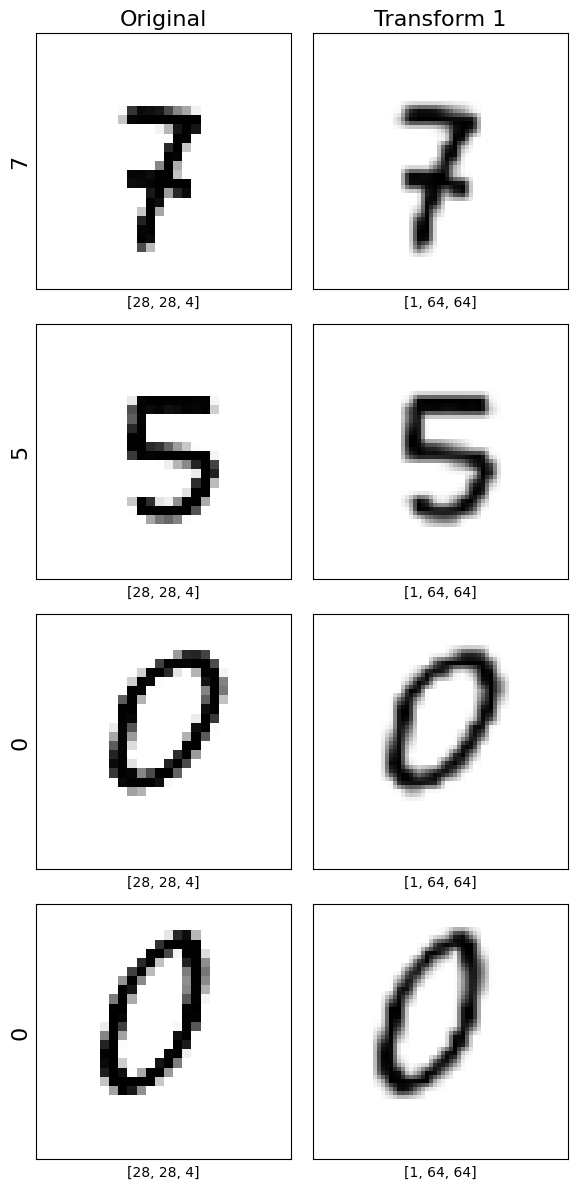

In [15]:
plot_transform(dataset=data.train_dataset, transform=simple_transform, n=4, fig_width=6)

## Training

In [4]:
!python -m training.train --epochs 2 --batch_size 32 --learning_rate 0.001 -t simple_transform --hidden_units 10 --num_workers 1

Directory "training/models" has been created
Directory "training/models\model_0" has been created
--------------------------------------------------
Epoch: 0
Train ->  Loss: 0.139 | Accuracy: 0.96
Test  ->  Loss: 0.004 | Accuracy: 1.0

Saved model to "training/models\model_0\best.pt"
--------------------------------------------------
Epoch: 1
Train ->  Loss: 0.007 | Accuracy: 1.0
Test  ->  Loss: 0.001 | Accuracy: 1.0

Saved model to "training/models\model_0\best.pt"
Saved model to "training/models\model_0\last.pt"
Saved model results to: "training/models\model_0\results.csv"
Training completed in 1096 seconds


In [12]:
from training.model_builder import TinyVGG

model = TinyVGG(in_channels=1, hidden_units=10, out_features=len(data.classes))
model.load_state_dict(torch.load('training/models/model_0/best.pt', weights_only=True))

<All keys matched successfully>

Images plot: 12



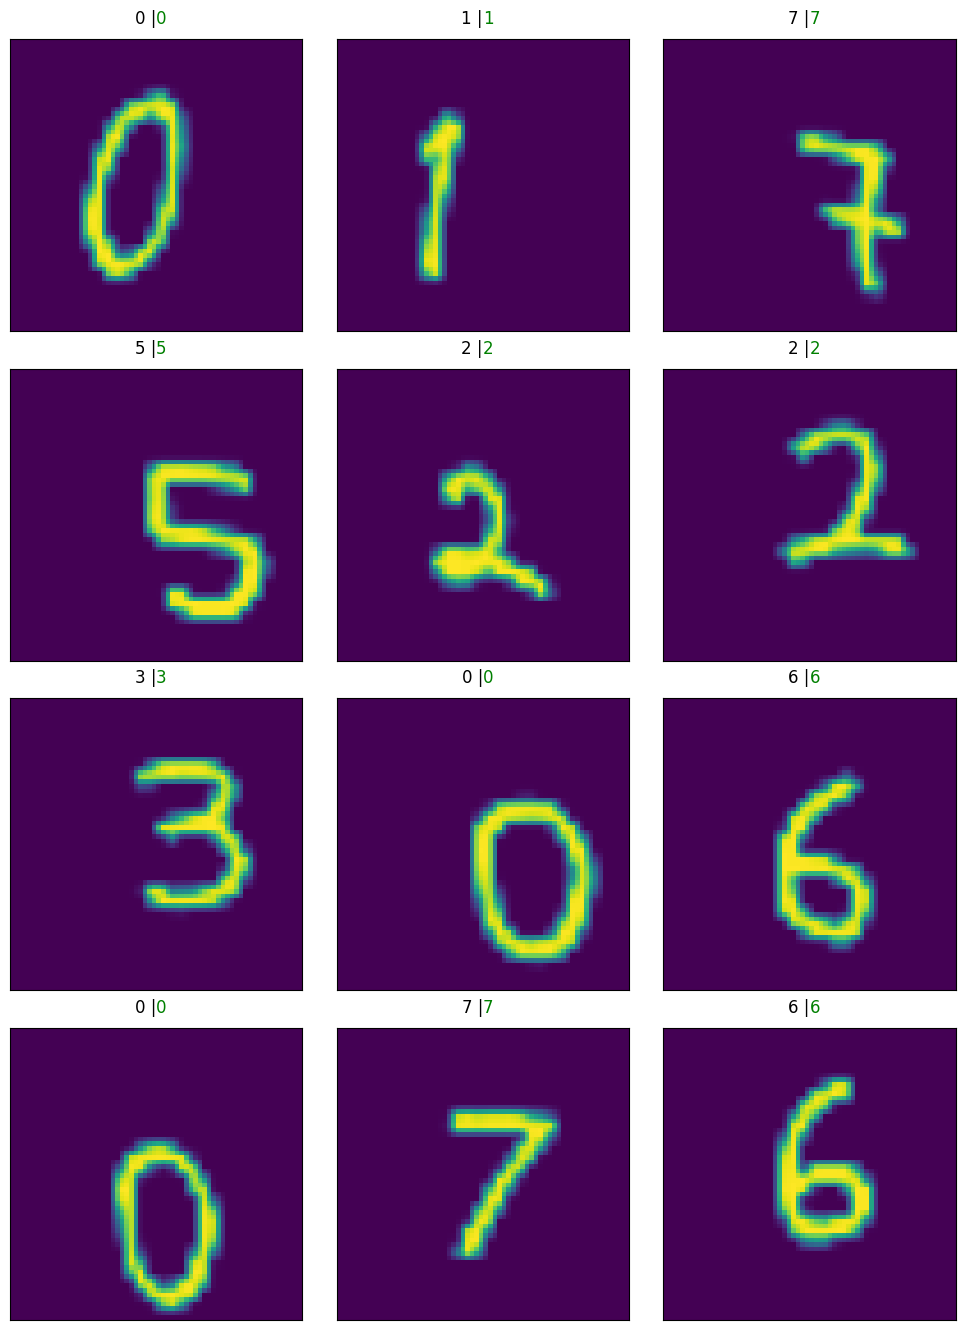

In [13]:
plot_predict_images(model=model, dataset=data.test_dataset)

In [14]:
plot_confussion_matrix(model=model, dataset=data.train_dataset)

AttributeError: 'CustomDataSet' object has no attribute 'targets'

In [15]:
data.train_dataset.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']